In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import analysis_perDRG_F3_hist_MA

In [3]:
name = 'F3_CCI_d7_'
with open('F3_CCI_d7.json') as f:
    results_d7cci = json.load(f)

In [4]:
d7cci_il = analysis_perDRG_F3_hist_test.GroupData (results_d7cci, "IL" , anz_rats = 6)
d7cci_cl = analysis_perDRG_F3_hist_test.GroupData (results_d7cci, "CL" , anz_rats = 6)

In [5]:
#calculates mean percentage of neurons per sizebin
nf_sizecounts_il = np.mean(d7cci_il.nf_sizecounts_allrats, axis=0)
nf_sizecounts_cl = np.mean(d7cci_cl.nf_sizecounts_allrats, axis=0)
ib4_sizecounts_il = np.mean(d7cci_il.ib4_sizecounts_allrats, axis=0)
ib4_sizecounts_cl = np.mean(d7cci_cl.ib4_sizecounts_allrats, axis=0)
atf3_sizecounts_il = np.mean(d7cci_il.atf3_sizecounts_allrats, axis=0)
atf3_sizecounts_cl = np.mean(d7cci_cl.atf3_sizecounts_allrats, axis=0)

In [9]:
c = sns.color_palette("tab20")

In [54]:
def plot_neuronnumber (sizecounts_il, sizecounts_cl, legend_il, legend_cl, titel, c):
    labels = ["<200",'<400', '<600', '<800', '<1000', '<1200', '<1400','<1600','<1800','<2000','<2200','<2400','<2600']
    xpos = np.arange(100,3000,200)

    plt.figure(figsize=(10,8))
    plt.hist([d7cci_il.binsizes[:-1], d7cci_il.binsizes[:-1]], d7cci_il.binsizes, 
             weights=[sizecounts_il, sizecounts_cl], color = c)

    plt.rc('font',family='Arial')
    plt.legend([legend_il, legend_cl], fontsize=20)
    plt.xlim (0,2600)
    plt.ylim(0,25)
    linewidth = 5
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(length=10, width=linewidth, bottom=False)
    plt.yticks(fontsize=32)
    for label, x in zip(labels, xpos):
        plt.annotate(label, xy=(x+50, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -10), textcoords='offset points', va='top', ha='center', fontsize=24, rotation=-45)
    plt.xticks(visible=False)    
    plt.ylabel('% of neurons', fontsize=34)
    plt.xlabel('Area (µm$^2$)', fontsize=34, labelpad=70)
    plt.savefig(titel+'.png', bbox_inches = "tight")
    plt.show()

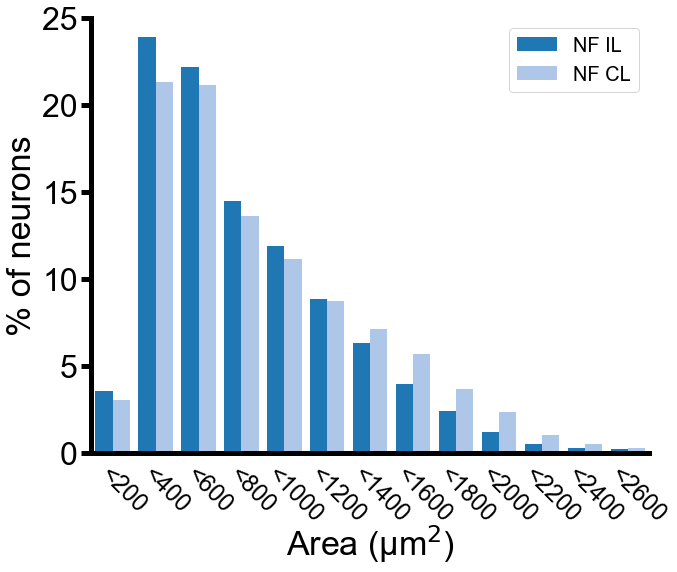

In [55]:
plot_neuronnumber (nf_sizecounts_il, nf_sizecounts_cl, "NF IL", "NF CL", "Histogram number of neurons",c[0:2] )

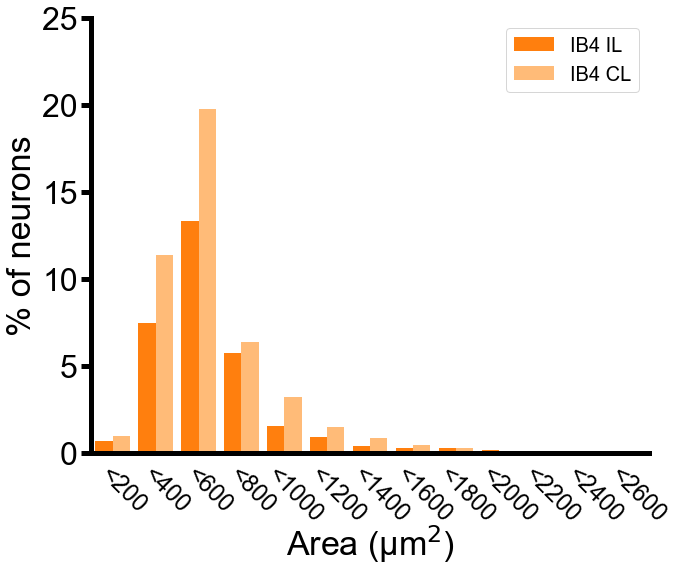

In [56]:
plot_neuronnumber (ib4_sizecounts_il, ib4_sizecounts_cl, "IB4 IL", "IB4 CL", "Histogram IB4 per neurons", c[2:4])

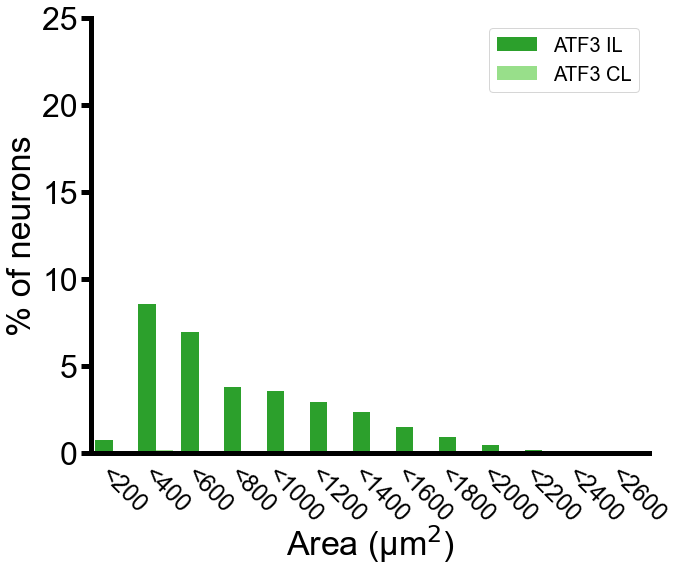

In [57]:
plot_neuronnumber (atf3_sizecounts_il, atf3_sizecounts_cl, "ATF3 IL", "ATF3 CL", "Histogram ATF3", c[4:6])